In [1]:
# Enable Pylab mode
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import pandas, SciPy, and Seaborn
import pandas as pd
import scipy
import seaborn as sns

In [3]:
# Define fixed input parameters
pct_reduction = 0.01

In [4]:
# Specify decision variable
sqft = 2500

In [5]:
# Specify number of simulation replications
n = 1000

In [6]:
# Generate random variates for random inputs
constr_costs_per_sqft = np.random.triangular(135,155,185,n)
time_to_sell = np.random.choice(np.arange(13), size=n, p=np.array([0,0.16,0.22,0.18,0.11,0.08,0.06,0.05,0.05,0.03,0.03,0.02,0.01]))
pct_off_asking = np.random.triangular(0,0.04,0.10,n)

In [7]:
# Calculate total construction costs
constr_costs = constr_costs_per_sqft * sqft

In [8]:
# Calculate selling price
initial_asking_price = (280 - 0.02 * sqft) * sqft
asking_price_at_sale = initial_asking_price * (1 - time_to_sell * pct_reduction)
sale_price = asking_price_at_sale * (1 - pct_off_asking)

In [9]:
# Calculate profit
profit = sale_price - constr_costs

In [10]:
# Summarize profit
scipy.stats.describe(profit)

DescribeResult(nobs=1000L, minmax=(46161.385503588186, 206736.57537278713), mean=130300.54783863174, variance=996343822.21571028, skewness=-0.21439044957400552, kurtosis=-0.38179084494143245)

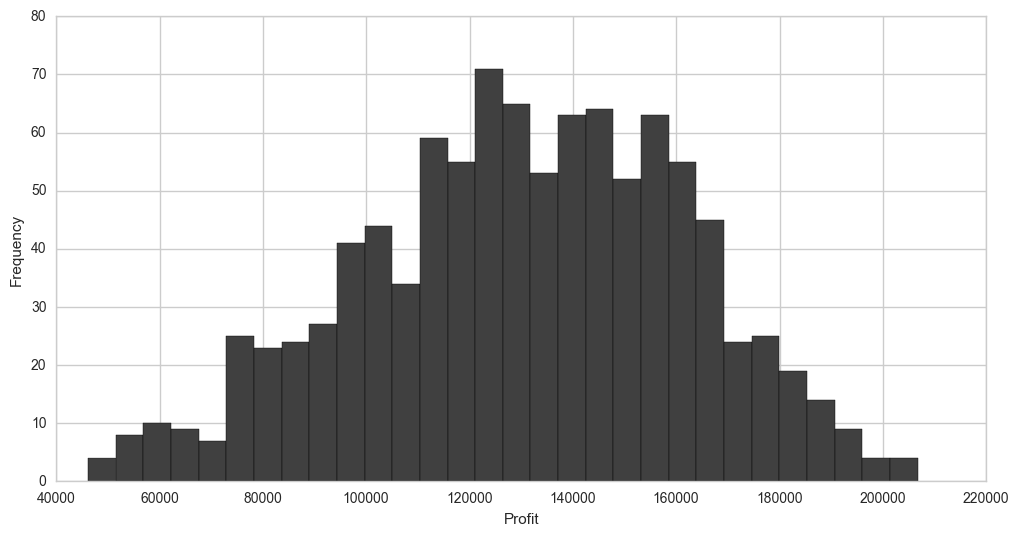

In [11]:
# Visualize distribution of profit
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.hist(profit, bins=30, color='0.25')
plt.xlabel('Profit')
plt.ylabel('Frequency')

In [12]:
# Explore range of house sizes
sizes = np.arange(2000,3100,100)
sizes

array([2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000])

In [13]:
# Initialize dictionary to store results
R = {}
R['mean'] = []
R['stdev'] = []
R['min'] = []
R['max'] = []
R['P > $50K'] = []

In [14]:
# Run simulation for each house size, using the same random variates
for sz in sizes:
    # Calculate total construction costs
    temp_constr_costs = constr_costs_per_sqft * sz
    
    # Calculate selling price
    temp_initial_asking_price = (280 - 0.02 * sz) * sz
    temp_asking_price_at_sale = temp_initial_asking_price * (1 - time_to_sell * pct_reduction)
    temp_sale_price = temp_asking_price_at_sale * (1 - pct_off_asking)
    
    # Calculate profit
    temp_profit = temp_sale_price - temp_constr_costs
    
    # Record results
    R['mean'].append(np.mean(temp_profit))
    R['stdev'].append(np.std(temp_profit))
    R['min'].append(np.min(temp_profit))
    R['max'].append(np.max(temp_profit))
    R['P > $50K'].append(np.sum(temp_profit > 50000) / float(n))

In [15]:
# Output results
rdf = pd.DataFrame(R, index=sizes, columns=['mean', 'stdev', 'min', 'max', 'P > $50K'])
rdf

,mean,stdev,min,max,P > $50K
2000,122556.273902,25638.706383,53737.602131,184467.648255,1.000
2100,124837.762114,26835.892798,52894.698555,189684.569197,1.000
2200,126752.933614,28025.461418,51715.625104,194519.922380,1.000
2300,128301.788402,29207.478583,50200.381778,198973.707803,1.000
2400,129484.326476,30382.011454,48348.968578,203045.925468,0.998
2500,130300.547839,31549.128013,46161.385504,206736.575373,0.997
2600,130750.452488,32708.897074,43637.632554,210045.657519,0.995
2700,130834.040425,33861.388288,40777.709730,212973.171906,0.990
2800,130551.311650,35006.672150,37581.617032,215519.118534,0.987
2900,129902.266161,36144.820008,34049.354459,217683.497402,0.980


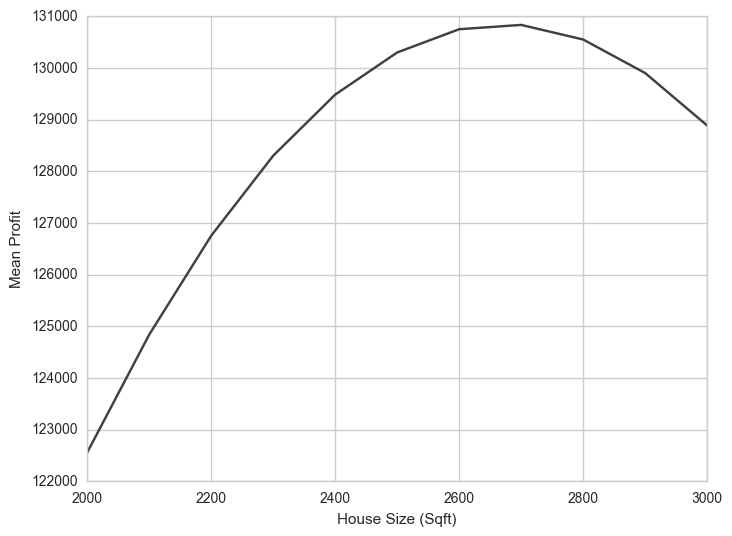

In [16]:
# Visualize mean profit as a function of house size
rdf['mean'].plot(kind='line', color='0.25', figsize=(8,6))
plt.xlabel('House Size (Sqft)')
plt.ylabel('Mean Profit')